The purpose of this notebook is to test pyhepmc's read capeabilties of .hepmc files and attempt to draw a histogram of the transverse momenta in collision events in which tau particles were produced. 

I made some test data using a monotau process (or, I tried to do this) using: **generate p p > ta- vl~ j**

In [1]:
import sys  #pip on the outside is takeing the day off.. 
!{sys.executable} -m pip install pyhepmc

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pyhepmc

Lets define a way to extract events from an .hepmc file; this will save me the troubble of putting the entire path everywhere I want to access the iterator.

In [3]:
def get_events():
    return pyhepmc.open("/home/leo/MadStats/MadGraph/mg5amcnlo/MONOTAU/Events/run_01/tag_1_pythia8_events.hepmc")

In [4]:
type(get_events())

pyhepmc.io.HepMCFile

get_events is an iterator, meaning in order to  read the file properly, we must iterate through each event sequentially and perform operations as we go.

What is the type of a single event within the file?

In [25]:
for a in get_events():
    print(type(a))
    break
#to acsess a single event, we must use this trick because get_events returns an itterable

<class 'pyhepmc._core.GenEvent'>


Waht does each event look like?

In [6]:
print(a)

________________________________________________________________________
GenEvent: #0
 Momentum units: GEV Position units: MM
 Entries in this event: 629 vertices, 1037 particles, 2 weights.
 Position offset: 0, 0, 0, 0
                                    GenParticle Legend
         ID    PDG ID   ( px,       py,       pz,     E )   Stat ProdVtx
________________________________________________________________________
Vtx:     -1 stat:   0 (X,cT): 0
 I:       1     2212 +0.00e+00,+0.00e+00,+6.50e+03,+6.50e+03   4     0
 O:       2       21 +8.77e-01,-2.07e+00,+3.95e+02,+3.95e+02  61    -1
          3       21 -1.18e+00,+2.92e-01,+3.38e+02,+3.38e+02  61    -1
          4       21 -6.43e-01,+1.01e+00,+6.11e+02,+6.11e+02  61    -1
          5       21 -4.50e-01,-1.23e+00,+4.25e+02,+4.25e+02  61    -1
          6       21 +2.35e+00,+1.80e+00,+9.13e+01,+9.14e+01  61    -1
          7     2203 -4.71e-01,-7.17e-03,+4.53e+03,+4.53e+03  63    -1
          8        1 -4.78e-01,+1.93e-01,+1.11e+02

These evenets contain all the relavent data ascocated with a collision event. I could, in theory, pull anything of intrest that any other data anylisis tool is capeable of (provided the time to write such a routine). In this case, my understanding is that I want to draw a histogram of the transverse momentum of all the tau particles. 

Ok; how many events are in the data? (We should know the answer to this already from setting up the simulation, but it's good confirmation that we know what we're looking at.)

In [7]:
count = 0 
for a in get_events():
    count += 1
count

10000

In [8]:
for a in get_events():
    break

In [9]:
print(a.particles) #I found a 'particles' member, lets see what that looks like

[GenParticle(FourVector(0, 0, 6.5e+03, 6.5e+03), mass=0.93827, pid=2212, status=4), GenParticle(FourVector(0.877, -2.07, 395, 395), mass=0, pid=21, status=61), GenParticle(FourVector(-1.18, 0.292, 338, 338), mass=0, pid=21, status=61), GenParticle(FourVector(-0.643, 1.01, 611, 611), mass=0, pid=21, status=61), GenParticle(FourVector(-0.45, -1.23, 425, 425), mass=0, pid=21, status=61), GenParticle(FourVector(2.35, 1.8, 91.3, 91.4), mass=0, pid=21, status=61), GenParticle(FourVector(-0.471, -0.00717, 4.53e+03, 4.53e+03), mass=0.77133, pid=2203, status=63), GenParticle(FourVector(-0.478, 0.193, 111, 111), mass=0.33, pid=1, status=63), GenParticle(FourVector(0, 0, -6.5e+03, 6.5e+03), mass=0.93827, pid=2212, status=4), GenParticle(FourVector(1.83, -1, -2.2e+03, 2.2e+03), mass=0, pid=21, status=61), GenParticle(FourVector(-0.304, -1.81, -0.787, 2), mass=0, pid=-1, status=61), GenParticle(FourVector(-1.62, -1.6, -272, 272), mass=0, pid=21, status=61), GenParticle(FourVector(1.02, 3.5, -45.2, 

In [10]:
for particle in a.particles:  #we can itterate through the particles
    print(particle)
    break

GenParticle(FourVector(0, 0, 6.5e+03, 6.5e+03), mass=0.93827, pid=2212, status=4)


Now we know how to acsess the particles and their members, this will be usefull because we can select and store all the taus. (Or, again,  anything else we might be intrested in.) 

In [27]:
taus = []
for event in get_events():
    for particle in event.particles:
        if particle.pid == 15:
            taus.append(particle)
print(len(taus))

14116


In [28]:
taus[0].momentum, taus[0].momentum.px

(FourVector(-4.13, 24, 6.69, 25.3), -4.126271353607588)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

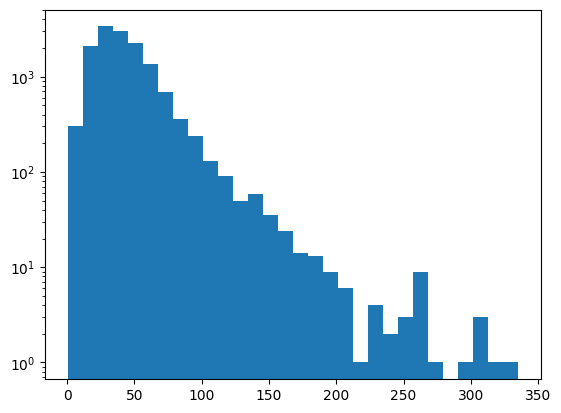

In [21]:
#enough bins so that the prominince of noise at low transverse momenta is obvous
plt.hist([np.sqrt((t.momentum.px**2)+(t.momentum.py**2)) for t in taus], bins=30)  
plt.yscale('log')

Now, we repackage the process into a function that takes as input the file path. Then we can test using the test data before running it on the some of the actual run data.

In [29]:
#all imports
import sys
!{sys.executable} -m pip install pyhepmc
import pyhepmc
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [16]:
def ReadData(data_path, pid=15):
    taus = []
    for event in pyhepmc.open(data_path):
        for particle in event.particles:
            if particle.pid == pid:
                taus.append(particle)
    return taus

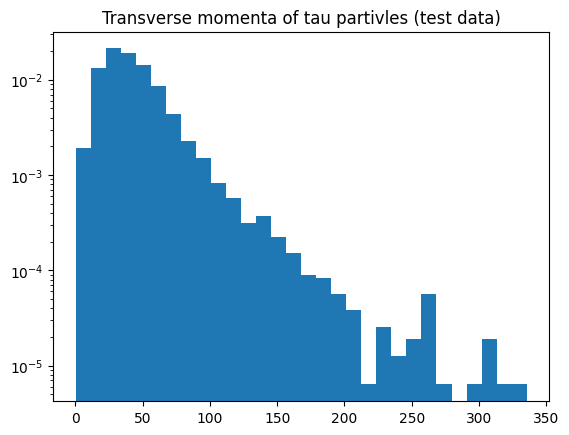

In [31]:
TAUS_test = ReadData("/home/leo/MadStats/MadGraph/mg5amcnlo/MONOTAU/Events/run_01/tag_1_pythia8_events.hepmc")

plt.hist([np.sqrt((t.momentum.px**2)+(t.momentum.py**2)) for t in TAUS_test], bins=30, density=True)
plt.title("Transverse momenta of tau partivles (test data)")
plt.yscale('log')
plt.show()

Now that we have the same output as above, we can run it on the production data.

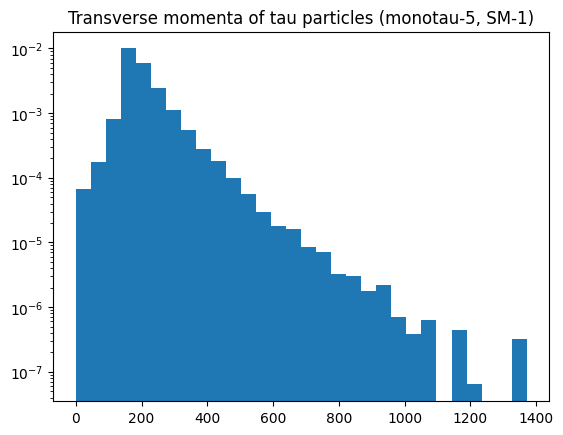

In [30]:
TAUS_prod = ReadData("/home/leo/MadStats/Notebooks/BenData/Events/run_01/SM-1_pythia8_events.hepmc")

plt.hist([np.sqrt((t.momentum.px**2)+(t.momentum.py**2)) for t in TAUS_prod], bins=30, density=True)
plt.title("Transverse momenta of tau particles (monotau-5, SM-1)")
plt.yscale('log')
plt.show()

Note that in the above two histograms, the density switch is turned on. This means the bars represenets the proporation of the total number of events which appear in that bin. 

### Luminosity

$lum*cross sec = num events/sec \rightarrow lum = (num events/sec)/cross sec$